<a href="https://colab.research.google.com/github/SomnathParkar/Coding/blob/main/india_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_file = '/content/drive/MyDrive/ML Projects/india_housing_prices.csv'
df = pd.read_csv(path_file)

In [ ]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

(None,
    ID        State      City      Locality      Property_Type  BHK  \
 0   1   Tamil Nadu   Chennai   Locality_84          Apartment    1   
 1   2  Maharashtra      Pune  Locality_490  Independent House    3   
 2   3       Punjab  Ludhiana  Locality_167          Apartment    2   
 3   4    Rajasthan   Jodhpur  Locality_393  Independent House    2   
 4   5    Rajasthan    Jaipur  Locality_466              Villa    4   
 
    Size_in_SqFt  Price_in_Lakhs  Price_per_SqFt  Year_Built  ...  \
 0          4740          489.76            0.10        1990  ...   
 1          2364          195.52            0.08        2008  ...   
 2          3642          183.79            0.05        1997  ...   
 3          2741          300.29            0.11        1991  ...   
 4          4823          182.90            0.04        2002  ...   
 
   Age_of_Property  Nearby_Schools  Nearby_Hospitals  \
 0              35              10                 3   
 1              17               8   

In [ ]:
missing_values = df.isnull().sum()

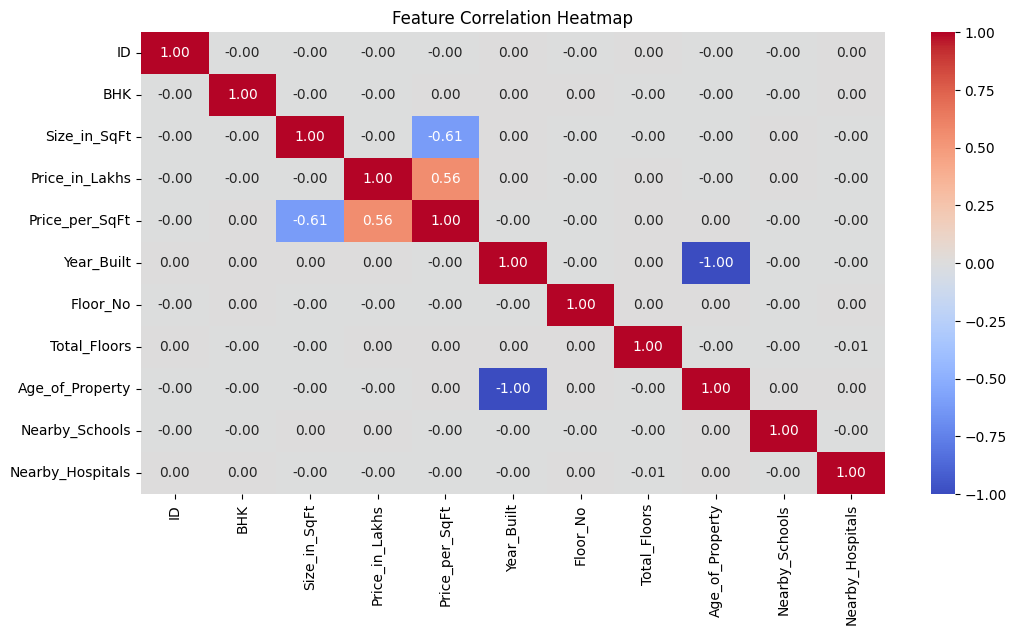

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
missing_values

,0
ID,0
State,0
City,0
Locality,0
Property_Type,0
BHK,0
Size_in_SqFt,0
Price_in_Lakhs,0
Price_per_SqFt,0
Year_Built,0


In [ ]:
target = "Price_in_Lakhs"
categorical_features = ["State", "City", "Locality", "Property_Type", "Furnished_Status",
                         "Public_Transport_Accessibility", "Parking_Space", "Security",
                         "Facing", "Owner_Type", "Availability_Status"]
numerical_features = ["BHK", "Size_in_SqFt", "Year_Built", "Floor_No", "Total_Floors",
                      "Age_of_Property", "Nearby_Schools", "Nearby_Hospitals"]

In [ ]:
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
X = df[categorical_features + numerical_features]
y = df[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(122.89148709599998, 142.2229368689211, -0.014640122034886849)